In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = np.loadtxt('../data/data.csv', delimiter = ',')

In [21]:
x = data[:,0]
y = data[:,1]

In [22]:
def distance(data,centroids):
    """calculate euclidean distance"""
    dist = np.sum((data[:, np.newaxis, :] - centroids)**2, axis=2)
    return dist

In [23]:
def hac(data, n_cluster):
    #calculate the distance matrix
    d = distance(data, data)
    #make the entry in diagonal and below as infinity since it symmetric and don't care the distance with itself
    d[np.tril_indices_from(d)] = float('inf')
    #initinize the label
    unique_clu = np.arange(len(d))
    while np.unique(unique_clu).size > n_cluster:
        #find the location corresponding to least distance
        x1, x2 = np.where(d == np.min(d))
        #assign the entry label to the minimum label(arbitrarily)
        unique_clu[[x1[0],x2[0]]] = np.min(unique_clu[[x1[0],x2[0]]])
        #replace the distance with infinity (make sure not revisit)
        d[x1[0],x2[0]] = float('inf')
    return unique_clu

In [24]:

unique_clu = hac(data, 2)

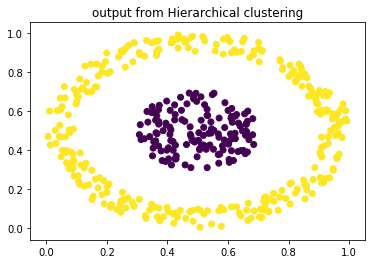

In [25]:

plt.scatter(x, y, c=unique_clu)
plt.title("output from Hierarchical clustering")
plt.show()